<h1>How Bond Prices Vary with Interest Rates</h1>


<h4>Present Value of Bond at the time of emission:</h4>

\begin{equation}
    \begin{gathered}
        PV(bond) = PV(annuity\ of\ coupon\ payments) \\
        + PV(final\ payment\ of\ principal)\\
        = \frac{C}{(1+r_0)} + \frac{C}{(1+r_0)^2} + \cdot\cdot\cdot + \frac{C+P}{(1+r_0)^t}\\
        = \frac{P\cdot i}{(1+r_0)} + \frac{P\cdot i}{(1+r_0)^2} + \cdot\cdot\cdot + \frac{P\cdot i+P}{(1+r_0)^t}
    \end{gathered}
\end{equation}

$Where:$
\begin{split}
&PV &= Present\ Value\\
&C &= Coupon\ payment\\
&P &= Principal\\
&r_0 &= discount\ rate\ at\ the\ time\ of\ the\ bond\ emission\\
&t &= number\ of\ years\ to\ maturity\\
&i &= interest\ stipulated\ at\ the\ time\ of\ the\ bond\ emission\\
\end{split}

<h4>Face Value of Bond when the new interest rate is $r_1$:</h4>

\begin{equation}
    \begin{gathered}
        Face\ Value\ (bond) = PV(annuity\ of\ coupon\ payments)\\
        + PV(final\ payment\ of\ principal),\ discounted\ at\ the\ new\ discount\ rate\ r_1:\\
        FV = \frac{C}{(1+r_1)} + \frac{C}{(1+r_1)^2} + \cdot\cdot\cdot + \frac{C+P}{(1+r_1)^t}\\
        = \frac{P\cdot i}{(1+r_1)} + \frac{P\cdot i}{(1+r_1)^2} + \cdot\cdot\cdot + \frac{P\cdot i+P}{(1+r_1)^t}\\
        = \frac{FV\cdot r_1}{(1+r_1)} + \frac{FV\cdot r_1}{(1+r_1)^2} + \cdot\cdot\cdot + \frac{FV\cdot r_1+FV}{(1+r_1)^t}
    \end{gathered}
\end{equation}

$Where:\\
r_1 = new\ interest\ rate$

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 9]

<h4>Bond Prices vs Interest Rates Plot</h4>

In [3]:
P=100    # P: Principal = 100 $ (from 100 dollars we can easily extrapolate to any value, as 110$ = 110% of 100 and 90$ = 90% of 100)
i = 2    # i: Interest stipulated at the time of the bond's emission --> remind me to create a slider
t=5      # t: number of years to maturity --> create an interactive selector as well

In [4]:
r = np.arange(0.1,12.1,0.1)    # r: new interest rate, which can be higher or lower. Here I create an array of values from 0.1 to 12 with interval 0.1

In [5]:
C = P*(i/100)    # C: Constant Coupon to be payed each year
Coupons = [C/((1+(r/100))**t) for n in range(1, t+1)]   # array of arrays with all the values of the coupons at each t and r discounted at the PV

In [6]:
sumCoupons = np.sum(Coupons, axis=0)    # For each r, summate all the discounted coupons along the t axis, from 1 to t ( for each r, compute sum(PV(C)) )

In [7]:
presValPrincipal = P/((1+(r/100))**t)    # For each r, discount Principal at PV

In [8]:
FV = sumCoupons + presValPrincipal    # FV: Face Value. Equals the sum of all discounted coupons + PV(P). We calculate one value for each new r

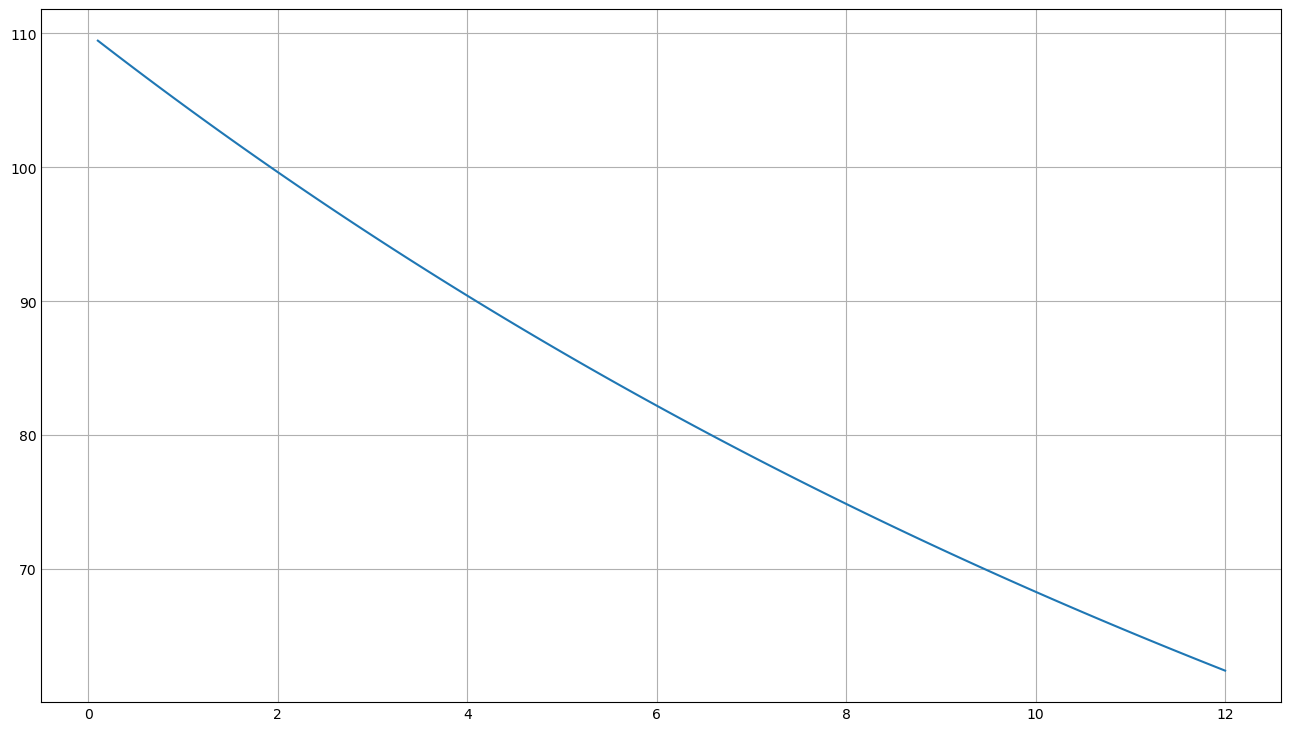

In [9]:
x, y = r, FV

fig = plt.figure()
plt.style.use('_mpl-gallery')
ax = fig.subplots()
ax.plot(x, y)